###                    <font color= cyan>  BIKE          SHARING          ASSIGNMENT </font>

#### STEPS :
1. DATA CLEANING
2. DATA PREPAREING
3. SPLITTING DATA TO TRAIN AND TEST
4. BUILD A LINEAR REGRESSION MODEL
5. RESIDUAL ANALYSIS 
6. MAKING PREDICTION
7. MODEL EVALUATION

In [1]:
# IMPORT LIBRARIES FOR DATA CLEANING, PREPAREING, MODELING

import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns, sklearn , statsmodels.api as sm, warnings

import statsmodels.api as sm

# FOR SPLITTING DATA T0 TRAIN AND TEST
from sklearn.model_selection import train_test_split

# FOR SCALLING THE DATA
from sklearn.preprocessing import MinMaxScaler

# FOR RFE 
from sklearn.feature_selection import RFE

# FOR MODEL BUILING USING SKLEARN
from sklearn.linear_model import LinearRegression

# FOR VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

# FOR R2 SQAURE CALCULATION
from sklearn.metrics import r2_score


warnings.filterwarnings('ignore')

In [2]:
pd.set_option("display.precision", 2)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
# IMPORT CSV FILE AND OBSERVE THE DATA
bike= pd.read_csv('day.csv',encoding='palmos')
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.11,18.18,80.58,10.75,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.90,17.69,69.61,16.65,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.05,9.47,43.73,16.64,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.20,10.61,59.04,10.74,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.31,11.46,43.70,12.52,82,1518,1600


In [4]:
bike.shape

(730, 16)

In [5]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.00,730.00,730.0,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00
mean,365.50,2.50,0.5,6.53,0.03,3.00,0.68,1.39,20.32,23.73,62.77,12.76,849.25,3658.76,4508.01
std,210.88,1.11,0.5,3.45,0.17,2.01,0.47,0.54,7.51,8.15,14.24,5.20,686.48,1559.76,1936.01
min,1.00,1.00,0.0,1.00,0.00,0.00,0.00,1.00,2.42,3.95,0.00,1.50,2.00,20.00,22.00
25%,183.25,2.00,0.0,4.00,0.00,1.00,0.00,1.00,13.81,16.89,52.00,9.04,316.25,2502.25,3169.75
50%,365.50,3.00,0.5,7.00,0.00,3.00,1.00,1.00,20.47,24.37,62.62,12.13,717.00,3664.50,4548.50
75%,547.75,3.00,1.0,10.00,0.00,5.00,1.00,2.00,26.88,30.45,72.99,15.63,1096.50,4783.25,5966.00
max,730.00,4.00,1.0,12.00,1.00,6.00,1.00,3.00,35.33,42.04,97.25,34.00,3410.00,6946.00,8714.00


In [7]:
round(100*(bike.isnull().sum()/len(bike.index)),2)

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

#### <font color='yellow'> DATA CLEANING </font>

In [8]:
# DROP "instant" COLUMNS AS IT WON'T HAVE ANY ROLE ID MODEL
bike=bike.drop("instant",1)

In [9]:
# RENAME THE SOME COLUMN FOR MORE READBALE 
bike.rename(columns={'yr':'year','mnth':"month",'hum':'humidity','cnt':'count'},inplace=True)

In [10]:
bike.shape

(730, 15)

In [11]:
# CHECHKING ANY DUPLICATE VALUES PRESENT
bike.drop_duplicates(subset=None,inplace=True)

In [12]:
bike.shape

(730, 15)

In [13]:
# CHANGE THIS VALUE ACCORDING DATA DICTIONRY , HELP US TO CREATE DUMMY VARRIABLE AND WE CAN EASILY UNDERSTAND THE DATA
bike.season=bike.season.map({1:'spring',2:'summer',3:"fall",4:'winter'})
bike.month=bike.month.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
bike.weathersit = bike.weathersit.map({1: 'Clear',2:'Mist + Cloudy',3:'Light Snow',4:'Snow + Fog'})
bike.weekday=bike.weekday.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})


In [14]:
bike.head()

,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
0,01-01-2018,spring,0,Jan,0,Sat,0,Mist + Cloudy,14.11,18.18,80.58,10.75,331,654,985
1,02-01-2018,spring,0,Jan,0,Sun,0,Mist + Cloudy,14.90,17.69,69.61,16.65,131,670,801
2,03-01-2018,spring,0,Jan,0,Mon,1,Clear,8.05,9.47,43.73,16.64,120,1229,1349
3,04-01-2018,spring,0,Jan,0,Tue,1,Clear,8.20,10.61,59.04,10.74,108,1454,1562
4,05-01-2018,spring,0,Jan,0,Wed,1,Clear,9.31,11.46,43.70,12.52,82,1518,1600


#### <font color=yellow > DATA VISUALISATION </font>

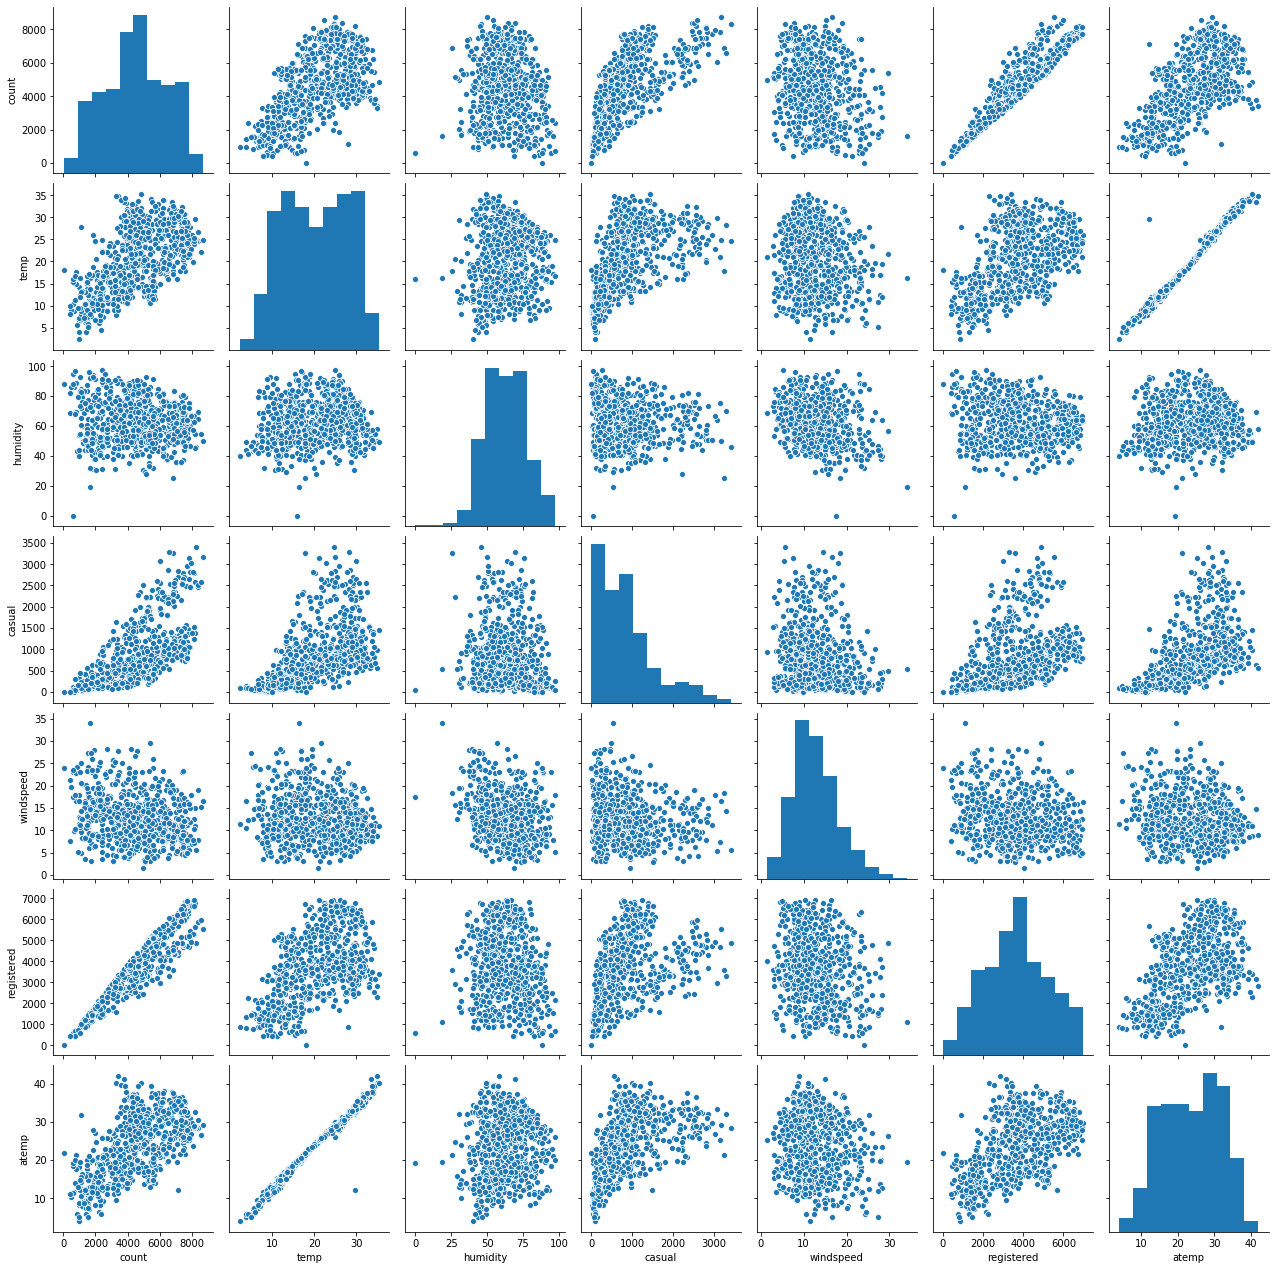

In [15]:
# WITH PAIR PLOT WE SEE THE RELATION OF INDEPENDENT VARRIABLE WITH DEPENDENT VARRIABLE
sns.pairplot(bike,vars=['count',"temp", "humidity",'casual','windspeed','registered','atemp'])

In [16]:
bike.head()

,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
0,01-01-2018,spring,0,Jan,0,Sat,0,Mist + Cloudy,14.11,18.18,80.58,10.75,331,654,985
1,02-01-2018,spring,0,Jan,0,Sun,0,Mist + Cloudy,14.90,17.69,69.61,16.65,131,670,801
2,03-01-2018,spring,0,Jan,0,Mon,1,Clear,8.05,9.47,43.73,16.64,120,1229,1349
3,04-01-2018,spring,0,Jan,0,Tue,1,Clear,8.20,10.61,59.04,10.74,108,1454,1562
4,05-01-2018,spring,0,Jan,0,Wed,1,Clear,9.31,11.46,43.70,12.52,82,1518,1600


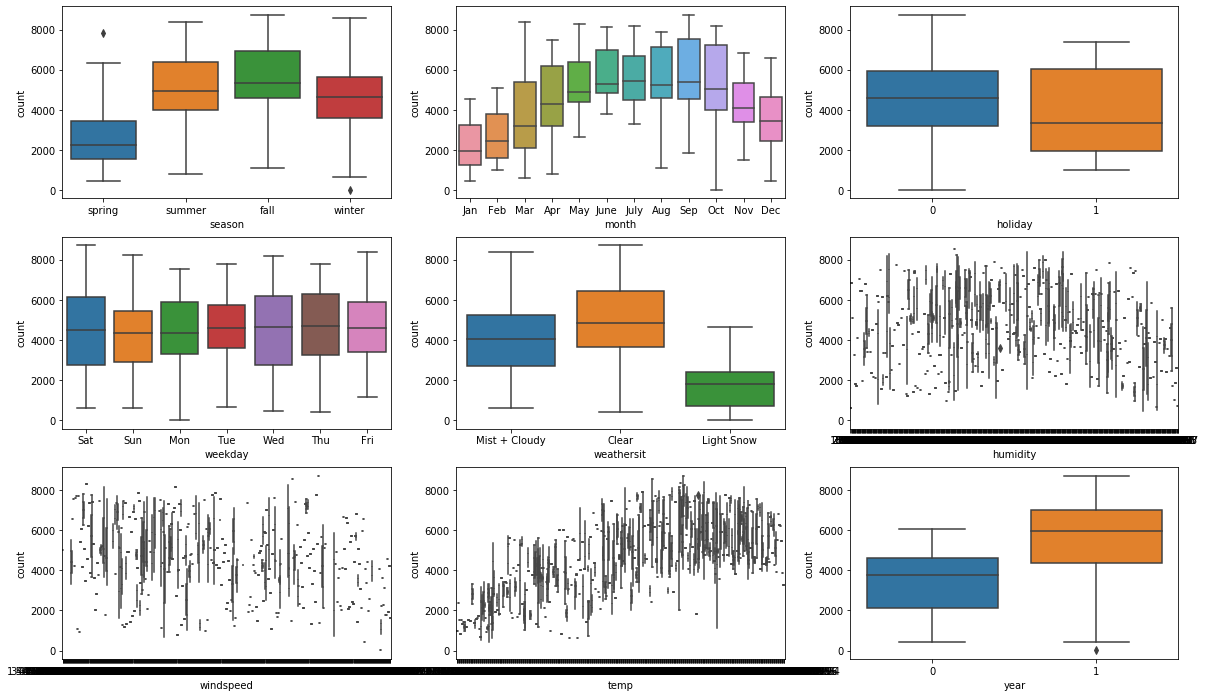

In [17]:
# RELATION B/W CATEGORICAL AND CONTINIOUS COLUMN
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'count', data = bike)
plt.subplot(3,3,2)
sns.boxplot(x = 'month', y = 'count', data = bike)
plt.subplot(3,3,3)
sns.boxplot(x = 'holiday', y = 'count', data = bike)
plt.subplot(3,3,4)
sns.boxplot(x = 'weekday', y = 'count', data = bike)
plt.subplot(3,3,5)
sns.boxplot(x = 'weathersit', y = 'count', data = bike)
plt.subplot(3,3,6)
sns.boxplot(x = 'humidity', y = 'count', data = bike)
plt.subplot(3,3,7)
sns.boxplot(x = 'windspeed', y = 'count', data = bike)
plt.subplot(3,3,8)
sns.boxplot(x = 'temp', y = 'count', data = bike)
plt.subplot(3,3,9)
sns.boxplot(x = 'year', y = 'count', data = bike)
plt.show()

###### bike booking are more often high in fall then summer
###### bike booking are more in june and july month
###### bike booking high in partly cloud which is obvious
###### bike booking increased from 2018 to 2019
###### bike booking more often saturday,wednesday,thurseday

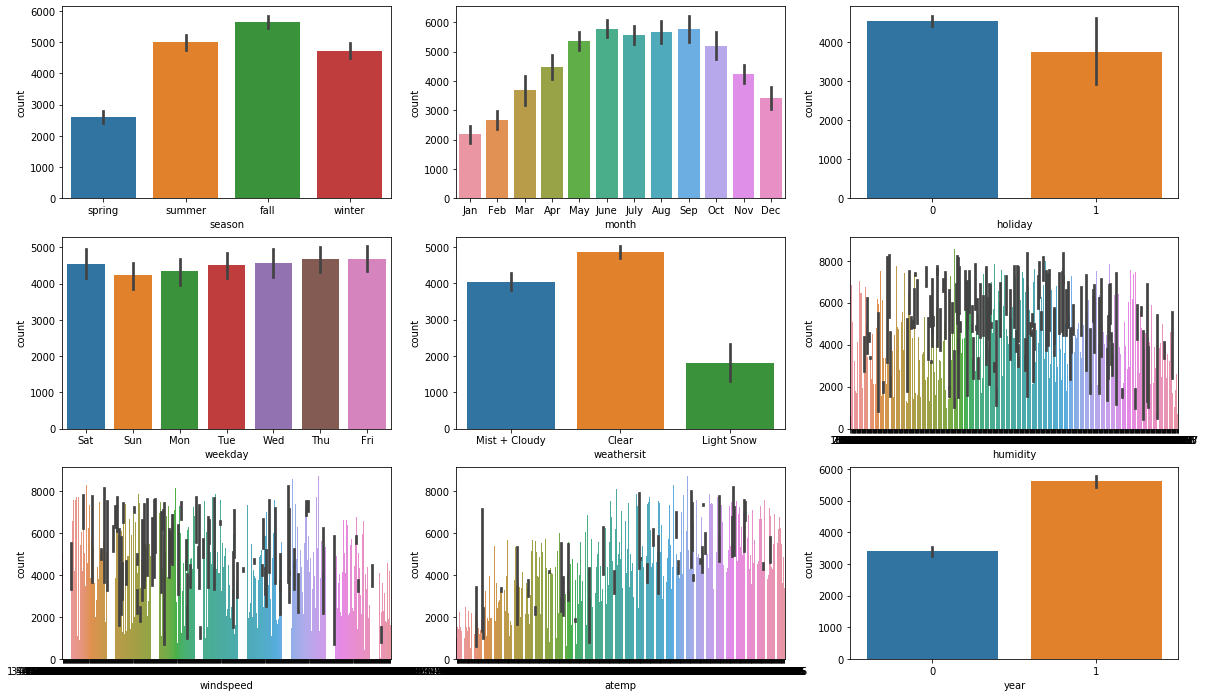

In [18]:
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.barplot(x = 'season', y = 'count', data = bike)
plt.subplot(3,3,2)
sns.barplot(x = 'month', y = 'count', data = bike)
plt.subplot(3,3,3)
sns.barplot(x = 'holiday', y = 'count', data = bike)
plt.subplot(3,3,4)
sns.barplot(x = 'weekday', y = 'count', data = bike)
plt.subplot(3,3,5)
sns.barplot(x = 'weathersit', y = 'count', data = bike)
plt.subplot(3,3,6)
sns.barplot(x = 'humidity', y = 'count', data = bike)
plt.subplot(3,3,7)
sns.barplot(x = 'windspeed', y = 'count', data = bike)
plt.subplot(3,3,8)
sns.barplot(x = 'atemp', y = 'count', data = bike)
plt.subplot(3,3,9)
sns.barplot(x = 'year', y = 'count', data = bike)
plt.show()

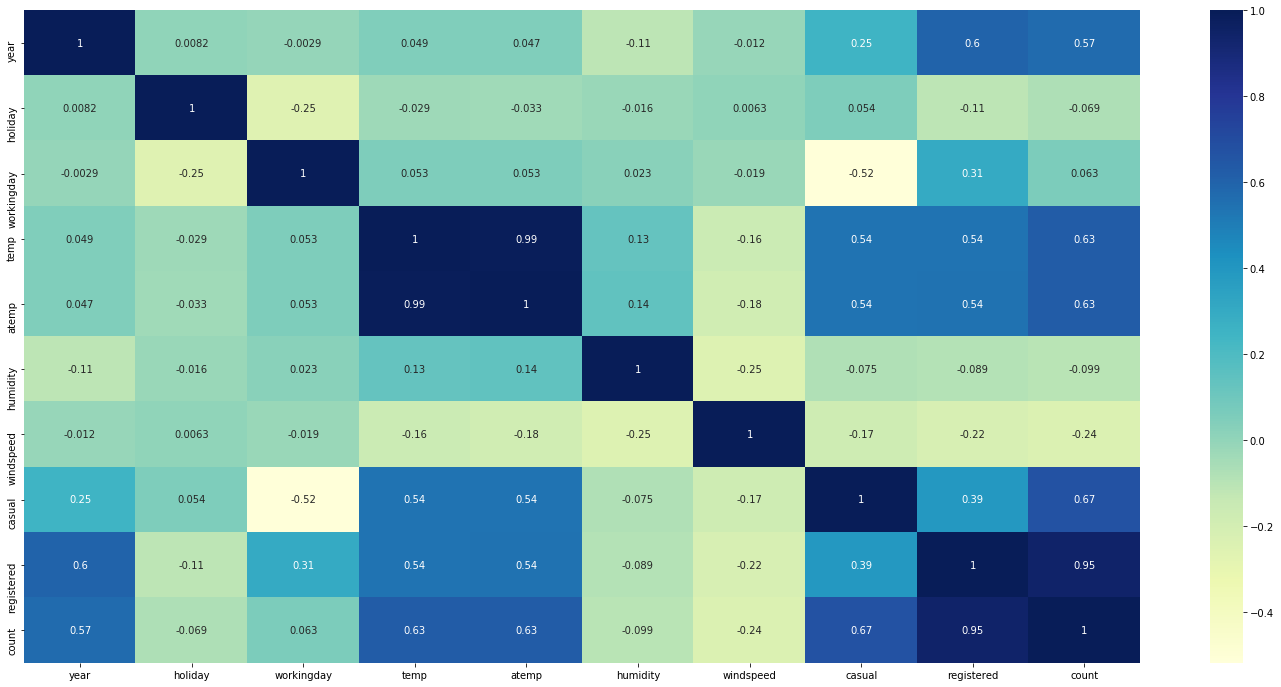

In [19]:
# PLOT HEATMAP TO KOW THE HIGHLY CO RELATED COLUMN
plt.figure(figsize=(25, 12))
sns.heatmap(bike.corr(), cmap='YlGnBu', annot = True)
plt.show()

In [20]:
# AS WE SEE MOST COLUMN SHOWS HIGHLY CO RELATE TO EACH OTHER, LET'S DROP THOSE COLUMN TO AVOID REDDUNDNT AND MULTICOLLINEARITY
bike=bike.drop(['dteday','casual','registered','atemp'],1)

In [21]:
bike.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,humidity,windspeed,count
0,spring,0,Jan,0,Sat,0,Mist + Cloudy,14.11,80.58,10.75,985
1,spring,0,Jan,0,Sun,0,Mist + Cloudy,14.90,69.61,16.65,801
2,spring,0,Jan,0,Mon,1,Clear,8.05,43.73,16.64,1349
3,spring,0,Jan,0,Tue,1,Clear,8.20,59.04,10.74,1562
4,spring,0,Jan,0,Wed,1,Clear,9.31,43.70,12.52,1600


#### <font color=yellow> DATA PREPARTION </font>

In [22]:
# LET'S DEAL WITH DUMMY VARRIABLE
months=pd.get_dummies(bike.month,drop_first=True)
weekdays=pd.get_dummies(bike.weekday,drop_first=True)
weather_sit=pd.get_dummies(bike.weathersit,drop_first=True)
seasons=pd.get_dummies(bike.season,drop_first=True)

In [23]:
# CONCAT THOSE  COLUMN
# Add the results to the original bike dataframe
bike=pd.concat([months,weekdays,weather_sit,seasons,bike],axis=1)
bike.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy,spring,summer,winter,season,year,month,holiday,weekday,workingday,weathersit,temp,humidity,windspeed,count
0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,spring,0,Jan,0,Sat,0,Mist + Cloudy,14.11,80.58,10.75,985
1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,spring,0,Jan,0,Sun,0,Mist + Cloudy,14.90,69.61,16.65,801
2,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,spring,0,Jan,0,Mon,1,Clear,8.05,43.73,16.64,1349
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,spring,0,Jan,0,Tue,1,Clear,8.20,59.04,10.74,1562
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,spring,0,Jan,0,Wed,1,Clear,9.31,43.70,12.52,1600


In [24]:
bike.shape

(730, 33)

In [25]:
# DROP COLUMN 
# Drop 'season','month','weekday','weathersit' as we have created the dummies for it
bike.drop(['season','month','weekday','weathersit'], axis = 1, inplace = True)
bike.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy,spring,summer,winter,year,holiday,workingday,temp,humidity,windspeed,count
0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,14.11,80.58,10.75,985
1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,14.90,69.61,16.65,801
2,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,8.05,43.73,16.64,1349
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,8.20,59.04,10.74,1562
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,9.31,43.70,12.52,1600


In [26]:
bike.shape

(730, 29)

#### <font color = yellow> SPLITTING THE DATA TO TRAIN AND TEST SET </font>

In [27]:
#SPLITTING THE DATA AS 70 30 RATION 
np.random.seed(0)
bike_train,bike_test= train_test_split(bike,train_size=0.7,random_state=100)

In [28]:
bike_train.shape

(510, 29)

In [29]:
bike_test.shape

(220, 29)

#### <font color= yellow > SCALLING THE DATA </font>

In [30]:
# CHOOSE THE COLUMN FOR SCALLING
num_var=['temp','humidity','windspeed','count']

In [31]:
# CREATE AN OBJECT OF MINMAXSCALER
scaler=MinMaxScaler()

In [32]:
# WE USE FIT_TRANFORM IN TRAIN SET
bike_train[num_var]=scaler.fit_transform(bike_train[num_var])

In [33]:
bike_train.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy,spring,summer,winter,year,holiday,workingday,temp,humidity,windspeed,count
576,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0.82,0.73,0.26,0.83
426,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0.44,0.64,0.26,0.47
728,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0.25,0.50,0.66,0.20
482,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0.40,0.50,0.19,0.48
111,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0.35,0.75,0.38,0.19


In [34]:
# CHECK THE MAX , MIN AND  MEDIAN OF ALL COLUMNS 
bike_train.describe()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy,spring,summer,winter,year,holiday,workingday,temp,humidity,windspeed,count
count,510.00,510.00,510.00,510.00,510.00,510.00,510.0,510.00,510.00,510.00,510.00,510.00,510.00,510.00,510.00,510.00,510.00,510.00,510.00,510.00,510.00,510.00,510.00,510.00,510.00,510.00,510.00,510.00,510.00
mean,0.10,0.08,0.07,0.09,0.08,0.08,0.1,0.08,0.09,0.08,0.08,0.15,0.15,0.14,0.13,0.13,0.16,0.03,0.35,0.24,0.25,0.25,0.51,0.03,0.68,0.54,0.65,0.32,0.51
std,0.29,0.28,0.25,0.28,0.27,0.27,0.3,0.28,0.28,0.28,0.27,0.36,0.36,0.35,0.34,0.34,0.37,0.17,0.48,0.43,0.43,0.43,0.50,0.16,0.47,0.23,0.15,0.17,0.22
min,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.34,0.54,0.20,0.36
50%,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.54,0.65,0.30,0.52
75%,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00,0.74,0.75,0.41,0.68
max,1.00,1.00,1.00,1.00,1.00,1.00,1.0,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


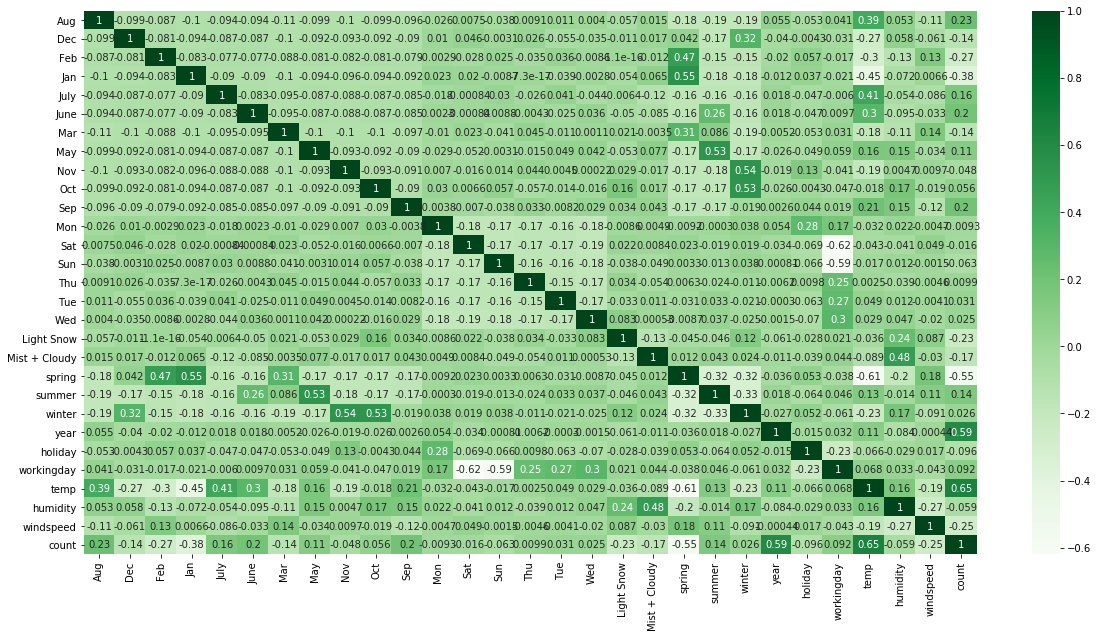

In [35]:
# CHECK AGAIN THE CO RELETION OF COLUMN USING HEATMAP

plt.figure(figsize=(20,10))
sns.heatmap(bike_train.corr(),cmap='Greens',annot=True)
plt.show()

In [36]:
y_train=bike_train.pop('count')
X_train=bike_train

#### <font color=yellow > BUILDING LINNEAR MODEL </font>

In [37]:
# WE WILL USE RFE APPROACH WITH 10 COLUMNS AND LET'S SEE :

# lm IS THE BOJECT OF LINEARREGRESSION()
lm= LinearRegression()
lm.fit(X_train,y_train)
rfe=RFE(lm,10)   # RUN RFE
rfe=rfe.fit(X_train,y_train)

In [38]:
# LIST OF VARRIABLE SELECTED
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Aug', False, 12),
 ('Dec', False, 8),
 ('Feb', False, 10),
 ('Jan', False, 6),
 ('July', True, 1),
 ('June', False, 18),
 ('Mar', False, 19),
 ('May', False, 11),
 ('Nov', False, 7),
 ('Oct', False, 13),
 ('Sep', True, 1),
 ('Mon', False, 14),
 ('Sat', False, 4),
 ('Sun', False, 9),
 ('Thu', False, 16),
 ('Tue', False, 17),
 ('Wed', False, 15),
 ('Light Snow', True, 1),
 ('Mist + Cloudy', False, 3),
 ('spring', False, 2),
 ('summer', True, 1),
 ('winter', True, 1),
 ('year', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 5),
 ('temp', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1)]

In [39]:
true_col=X_train.columns[rfe.support_]

In [40]:
# COLUMN WHERE RFE SHOWS FALSE
X_train.columns[~rfe.support_]

Index(['Aug', 'Dec', 'Feb', 'Jan', 'June', 'Mar', 'May', 'Nov', 'Oct', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed', 'Mist + Cloudy', 'spring', 'workingday'], dtype='object')

In [41]:
# WE COPIED ALL THE COLUMN SUPPORT RFE TO X_TRAIN_RFE
X_train_rfe=X_train[true_col]

In [42]:
# ADD CONSTANT TO X_TRAIN_RFE
X_train_rfe = sm.add_constant(X_train_rfe)

In [43]:
# RUN THE LINEAR MODEL
# Running the linear model 
lm = sm.OLS(y_train,X_train_rfe).fit()

In [44]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     247.6
Date:                Mon, 31 Aug 2020   Prob (F-statistic):          2.79e-186
Time:                        23:01:24   Log-Likelihood:                 494.18
No. Observations:                 510   AIC:                            -966.4
Df Residuals:                     499   BIC:                            -919.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2682      0.026     10.292      0.000       0.217       0.319
July          -0.0482      0.018     -2.606      0.009      -0.085      -0.012
Sep            0.0944      0.016      5.724      0.000       0.062       0.127
Light Snow    -0.1914      0.026     -7.470      0.000      -0.242      -0.141
summer         0.0800      0.011      7.281      0.000       0.058       0.102
winter         0.1390      0.011     12.903      0.000       0.118       0.160
year           0.2259      0.008     27.118      0.000       0.210       0.242
holiday       -0.0930      0.026     -3.543      0.000      -0.145      -0.041
temp           0.6200      0.023     27.492      0.000       0.576       0.664
humidity      -0.2868      0.032     -9.045      0.000      -0.349      -0.224
windspeed     -0.2059      0.026     -7.889      0.000      -0.257      -0.155
==============================================================================
Omnibus:                       53.056   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               92.833
Skew:                          -0.655   Prob(JB):                     6.94e-21
Kurtosis:                       4.629   Cond. No.                         15.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### initially we got r squared 83.2%
##### prob of  f stat is very very low, so it's good

#### <font color = orange > VIF </font>

In [45]:
X_train_rfe=X_train_rfe.drop(['const'],1)

In [46]:
def vif_call(df):
    vif=pd.DataFrame()
    X=df
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    print(vif)

In [47]:
vif_call(X_train_rfe)

     Features    VIF
8    humidity  10.29
7        temp   9.29
9   windspeed   3.54
5        year   2.02
3      summer   1.76
4      winter   1.68
0        July   1.55
1         Sep   1.29
2  Light Snow   1.09
6     holiday   1.04


 #### top 3 vif value :
- HUMIDITY 29.37
- TEMP 17.8
- WORKING DAY 5.31

In [48]:
# REMOVE JULY AS IT'S SEEMS INSIGNIFICANT
X_train_model1=X_train_rfe.drop('July',1)

In [49]:
X_train_model1=sm.add_constant(X_train_model1)
lm=sm.OLS(y_train,X_train_model1).fit()

In [50]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     271.2
Date:                Mon, 31 Aug 2020   Prob (F-statistic):          4.74e-186
Time:                        23:01:25   Log-Likelihood:                 490.74
No. Observations:                 510   AIC:                            -961.5
Df Residuals:                     500   BIC:                            -919.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2682      0.026     10.234      0.000       0.217       0.320
Sep            0.1052      0.016      6.554      0.000       0.074       0.137
Light Snow    -0.1948      0.026     -7.570      0.000      -0.245      -0.144
summer         0.0892      0.010      8.523      0.000       0.069       0.110
winter         0.1434      0.011     13.413      0.000       0.122       0.164
year           0.2268      0.008     27.103      0.000       0.210       0.243
holiday       -0.0915      0.026     -3.467      0.001      -0.143      -0.040
temp           0.5928      0.020     29.471      0.000       0.553       0.632
humidity      -0.2784      0.032     -8.776      0.000      -0.341      -0.216
windspeed     -0.2034      0.026     -7.755      0.000      -0.255      -0.152
==============================================================================
Omnibus:                       60.303   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              109.427
Skew:                          -0.717   Prob(JB):                     1.73e-24
Kurtosis:                       4.759   Cond. No.                         15.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
X_train_model1=X_train_model1.drop(['const'],1)

In [52]:
vif_call(X_train_model1)

     Features    VIF
7    humidity  10.02
6        temp   7.11
8   windspeed   3.54
4        year   2.01
3      winter   1.64
2      summer   1.58
0         Sep   1.20
1  Light Snow   1.09
5     holiday   1.04


#### top 3 high vif
- humidity	10.02
- temp	7.11
- windspeed   3.54

In [53]:
# HOLIDAY HAVE LOW CO RELATION VALUE WITH COUNT SO REMOVE IT
X_train_model2=X_train_model1.drop('holiday',1)

In [54]:
X_train_model2=sm.add_constant(X_train_model2)
lm=sm.OLS(y_train,X_train_model2).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     297.1
Date:                Mon, 31 Aug 2020   Prob (F-statistic):          9.95e-185
Time:                        23:01:25   Log-Likelihood:                 484.68
No. Observations:                 510   AIC:                            -951.4
Df Residuals:                     501   BIC:                            -913.2
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2628      0.026      9.937      0.000       0.211       0.315
Sep            0.1022      0.016      6.307      0.000       0.070       0.134
Light Snow    -0.1918      0.026     -7.378      0.000      -0.243      -0.141
summer         0.0905      0.011      8.560      0.000       0.070       0.111
winter         0.1422      0.011     13.164      0.000       0.121       0.163
year           0.2272      0.008     26.850      0.000       0.211       0.244
temp           0.5965      0.020     29.376      0.000       0.557       0.636
humidity      -0.2761      0.032     -8.611      0.000      -0.339      -0.213
windspeed     -0.2049      0.027     -7.729      0.000      -0.257      -0.153
==============================================================================
Omnibus:                       68.289   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              134.149
Skew:                          -0.769   Prob(JB):                     7.41e-30
Kurtosis:                       4.987   Cond. No.                         15.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
X_train_model2=X_train_model2.drop("const",1)

In [56]:
vif_call(X_train_model2)

     Features    VIF
6    humidity  10.00
5        temp   7.10
7   windspeed   3.52
4        year   2.01
3      winter   1.64
2      summer   1.58
0         Sep   1.20
1  Light Snow   1.08


In [57]:
# LET'S DROP HUMIDITY FROM DATA
# HUMIDITY HAVE HIGH VIF 10.00, AND LOW CO RELATION VALUE WITH COUNT
X_train_model3=X_train_model2.drop('humidity',1)

In [58]:
X_train_model3=sm.add_constant(X_train_model3)
lm=sm.OLS(y_train,X_train_model3).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     287.1
Date:                Mon, 31 Aug 2020   Prob (F-statistic):          5.34e-171
Time:                        23:01:26   Log-Likelihood:                 449.48
No. Observations:                 510   AIC:                            -883.0
Df Residuals:                     502   BIC:                            -849.1
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0839      0.018      4.790      0.000       0.049       0.118
Sep            0.0868      0.017      5.035      0.000       0.053       0.121
Light Snow    -0.2502      0.027     -9.314      0.000      -0.303      -0.197
summer         0.0824      0.011      7.317      0.000       0.060       0.105
winter         0.1251      0.011     11.004      0.000       0.103       0.147
year           0.2337      0.009     25.908      0.000       0.216       0.251
temp           0.5719      0.022     26.576      0.000       0.530       0.614
windspeed     -0.1474      0.027     -5.366      0.000      -0.201      -0.093
==============================================================================
Omnibus:                       64.591   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              112.216
Skew:                          -0.778   Prob(JB):                     4.29e-25
Kurtosis:                       4.691   Cond. No.                         9.78
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [59]:
X_train_final=X_train_model3.copy()

In [60]:
X_train_model3=X_train_model3.drop("const",1)

In [61]:
vif_call(X_train_model3)

     Features   VIF
5        temp  3.63
6   windspeed  2.95
4        year  2.00
2      summer  1.55
3      winter  1.34
0         Sep  1.19
1  Light Snow  1.06


#### <font color = yellow > RES </font>

In [62]:
y_train_pred = lm.predict(X_train_final)

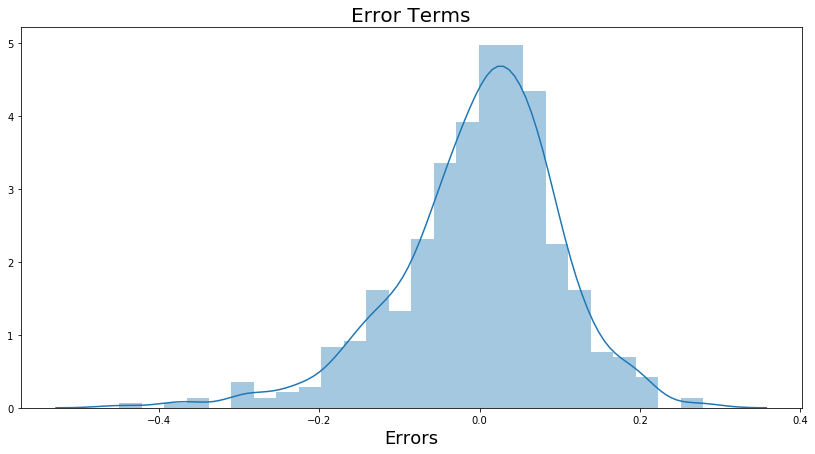

In [63]:
# CHECK ERROR TERM AS WE CAN SEE ERROR ARE NORMALLY DISTRIBUTED
plt.figure(figsize=(14,7))
sns.distplot((y_train - y_train_pred))
plt.title('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  # X-label
plt.show()

#### <font color = yellow > MAKING PREDICTION </font>

In [64]:
# APPLYING SCALLING
bike_test[num_var] = scaler.transform(bike_test[num_var])
bike_test.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy,spring,summer,winter,year,holiday,workingday,temp,humidity,windspeed,count
184,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0.83,0.66,0.08,0.69
535,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0.90,0.61,0.15,0.71
299,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0.51,0.84,0.33,0.30
221,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0.88,0.44,0.34,0.55
152,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0.82,0.31,0.54,0.57


In [65]:
# DIVIDE DATA TO X_TEST y_TEST
y_test = bike_test.pop('count')
X_test = bike_test
X_test.describe()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy,spring,summer,winter,year,holiday,workingday,temp,humidity,windspeed
count,220.00,220.00,220.0,220.00,220.00,220.00,220.00,220.00,220.00,220.00,220.00,220.00,220.00,220.00,220.00,220.00,220.0,220.00,220.00,220.00,220.00,220.00,220.00,220.00,220.00,220.00,220.00,220.00
mean,0.06,0.09,0.1,0.08,0.10,0.10,0.05,0.09,0.07,0.09,0.09,0.13,0.12,0.15,0.16,0.17,0.1,0.03,0.32,0.25,0.26,0.24,0.48,0.04,0.70,0.56,0.64,0.31
std,0.24,0.28,0.3,0.27,0.31,0.29,0.23,0.28,0.26,0.28,0.28,0.33,0.32,0.35,0.37,0.37,0.3,0.16,0.47,0.44,0.44,0.43,0.50,0.19,0.46,0.23,0.15,0.16
min,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.05,0.26,-0.04
25%,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.36,0.53,0.20
50%,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.56,0.63,0.30
75%,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,1.00,1.00,1.00,0.00,1.00,0.00,1.00,0.76,0.74,0.40
max,1.00,1.00,1.0,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.0,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.98,1.00,0.81


In [66]:
X_train_model3.columns

Index(['Sep', 'Light Snow', 'summer', 'winter', 'year', 'temp', 'windspeed'], dtype='object')

In [67]:
# LET'S PREDICT THE DATA USING OUR MODEL

# COPY COLUMN OF FINAL TRAIN MODULE TO TEST MODULE
X_test_new = X_test[X_train_model3.columns]

# ADD CONSTANT
X_test_new1 = sm.add_constant(X_test_new)
X_test_new1.head()

,const,Sep,Light Snow,summer,winter,year,temp,windspeed
184,1.0,0,0,0,0,0,0.83,0.08
535,1.0,0,0,1,0,1,0.90,0.15
299,1.0,0,0,0,1,0,0.51,0.33
221,1.0,0,0,0,0,0,0.88,0.34
152,1.0,0,0,1,0,0,0.82,0.54


In [68]:
y_pred = lm.predict(X_test_new1)

### <font color =yellow> CALCULATE R2 SQUARE </font>

In [69]:
r2_score(y_true=y_test,y_pred=y_pred)

0.7676656302707386

Text(0, 0.5, 'y_pred')

<Figure size 432x288 with 0 Axes>

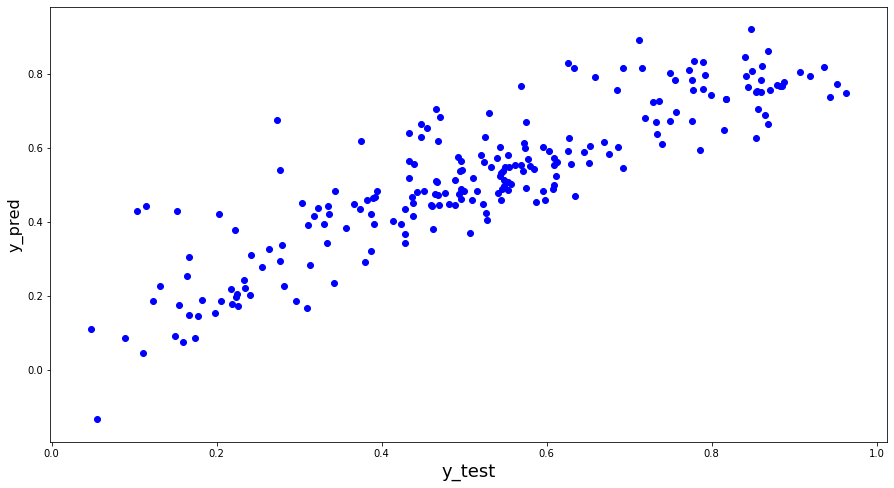

In [70]:
fig = plt.figure()
plt.figure(figsize=(15,8))
plt.scatter(y_test,y_pred,color='blue')
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)   

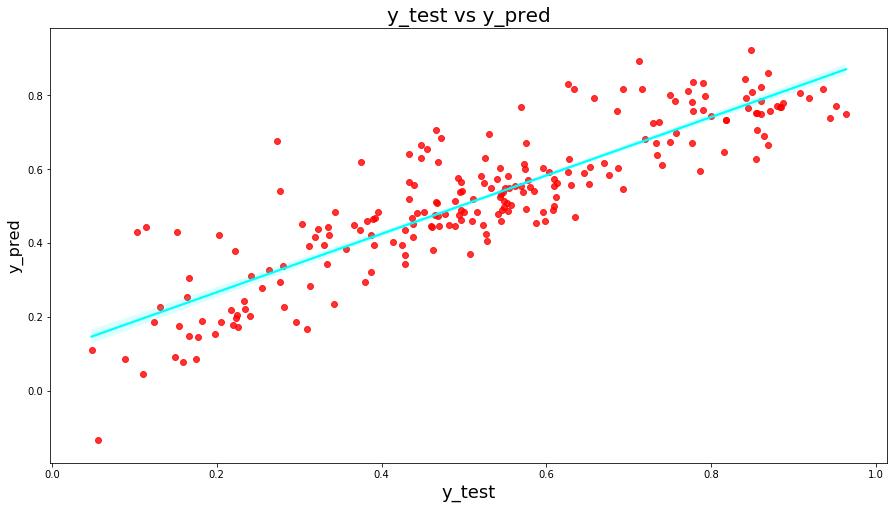

In [71]:
#Regression plot
plt.figure(figsize=(15,8))
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "red"}, line_kws={"color": "cyan"})

plt.title('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label
plt.show()

## COUNT = 0.0868xsep -0.2502xlightsnow + 0.0824xsummer + 0.1251xwinter + 0.2337xyear + 0.5719xtemp


Business Goals:
- BoomBikes can focus more on Temperature
- We can see demand for bikes was more in 2019 than 2018, so just focus as there is increase in 2019 and might be facing dips in their revenues due to the ongoing Corona pandemic and by the time it reduces the things will be better
- people rent less bike during holiday.
- Summer season people rent more on not working day, while in spring, fall and in winter
  people rent more bike during working day.
- Better the weather, more the count of rental bikes
- Bike rental count is increasing from Jan to Jun, remains constant till sept and then decreasing.
